In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer


In [2]:
df = pd.read_csv('/media/reindrairawan/New Volume/Data E/REPOSITORY/PYTHON/ProjectKuliah/NLP/ProjectUas(Sentimen_Analisis)/modelSentimen/hasilsentimenindonesia.csv')
df.columns = df.columns.str.replace('Unnamed: 0', 'text')
# df['comp_score'] = enc.fit_transform(df['comp_score'].values)
# df['text'] = enc.fit_transform(df['text'].values)
df

,text,neg,neu,pos,compound,comp_score
0,gue suprise sih citayam fashion week issuenya ...,0.000,1.000,0.000,0.0000,neu
1,rt thefirstxxviii nahh pdhal dri kagak tuh bik...,0.000,1.000,0.000,0.0000,neu
2,rt valosenadya ayo dng jujur yg citayam fashio...,0.000,1.000,0.000,0.0000,neu
3,rt suckerzpunch nih rapper ga laku dalem hati ...,0.000,1.000,0.000,0.0000,neu
4,nasi citayam fashion week videodreamcoid video...,0.000,1.000,0.000,0.0000,neu
...,...,...,...,...,...,...
1445,ga yg salah dgn scbd citayam fashion week kump...,0.000,0.950,0.050,0.2263,pos
1446,the trend called citayam fashion week in scbd ...,0.000,1.000,0.000,0.0000,neu
1447,rt vivacoid kawasan dukuh penuh remaja gelar j...,0.000,1.000,0.000,0.0000,neu
1448,kata sih scbd fashion week keren jg gk tuju ny...,0.000,1.000,0.000,0.0000,neu


In [3]:
datax = df.drop(columns='comp_score')
# datax = df.drop(columns='text')
datay = df['comp_score']
datax

,text,neg,neu,pos,compound
0,gue suprise sih citayam fashion week issuenya ...,0.000,1.000,0.000,0.0000
1,rt thefirstxxviii nahh pdhal dri kagak tuh bik...,0.000,1.000,0.000,0.0000
2,rt valosenadya ayo dng jujur yg citayam fashio...,0.000,1.000,0.000,0.0000
3,rt suckerzpunch nih rapper ga laku dalem hati ...,0.000,1.000,0.000,0.0000
4,nasi citayam fashion week videodreamcoid video...,0.000,1.000,0.000,0.0000
...,...,...,...,...,...
1445,ga yg salah dgn scbd citayam fashion week kump...,0.000,0.950,0.050,0.2263
1446,the trend called citayam fashion week in scbd ...,0.000,1.000,0.000,0.0000
1447,rt vivacoid kawasan dukuh penuh remaja gelar j...,0.000,1.000,0.000,0.0000
1448,kata sih scbd fashion week keren jg gk tuju ny...,0.000,1.000,0.000,0.0000


In [4]:
x=datax["text"]
y=df['comp_score']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13,
                                                    shuffle=True , stratify=y)
print(y.value_counts())

neu    1221
pos     171
neg      58
Name: comp_score, dtype: int64


In [5]:
# vectorize = merubah ke integer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

pipe = Pipeline(steps=[('vectorize', CountVectorizer(ngram_range=(1, 1), token_pattern=r'\b\w+\b')),
                       ('classifier', MultinomialNB())])

pipe.fit(x_train, y_train)

Pipeline(steps=[('vectorize', CountVectorizer(token_pattern='\\b\\w+\\b')),
                ('classifier', MultinomialNB())])

0.9137931034482759
              precision    recall  f1-score   support

         neg       1.00      0.25      0.40        12
         neu       0.91      0.99      0.95       244
         pos       0.91      0.59      0.71        34

    accuracy                           0.91       290
   macro avg       0.94      0.61      0.69       290
weighted avg       0.92      0.91      0.90       290



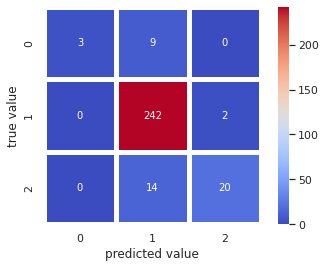

In [6]:
import warnings
warnings.filterwarnings('always') 
y_predict = pipe.predict(x_test)


print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

mat = confusion_matrix(y_test, y_predict)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=True, cmap='coolwarm', linewidths=5)
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()